Y = wX + b

w = w - alpha*dw
b = b - alpha*db

dw = -2/n * (sum(xi*(yi - yi_pred)))

db = -2/n * (sum(yi - yi_pred))

In [1]:
import numpy as np

Linear Regression

In [2]:
class Linear_Regression():

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # m -  number of rows - data size
    # n -  number of features
    self.m, self.n = X.shape


    # weights size will be equal to how many features are there
    self.w = np.zeros(self.n)    #(0,0 , 0 ,....0n)
    self.b = 0
    self.X = X
    self.Y = Y

    # gradient descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    # will declare prediction function later
    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    # Y = X*W + b
    return X.dot(self.w) + self.b


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data pre-processing

In [4]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     YearsExperience  Salary
0             False   False
1             False   False
2             False   False
3             False   False
4             False   False
5             False   False
6             False   False
7             False   False
8             False   False
9             False   False
10            False   False
11            False   False
12            False   False
13            False   False
14            False   False
15            False   False
16            False   False
17            False   False
18            False   False
19            False   False
20            False   False
21            False   False
22            False   False
23            False   False
24            False   False
25            False   False
26            False   False
27            False   False
28            False   False
29            False   False>

In [15]:
X = salary_data.iloc[:, : -1].values
Y = salary_data.iloc[:,1].values

In [16]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [17]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [20]:
model.fit(X_train, Y_train)

In [21]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9424.141953615417
bias =  25319.38046449761


In [22]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[115791.14321921  71497.67603721 102597.34448414  75267.33281866
  55476.63471607  60188.70569287]


Visualizing the predicted values and actual values

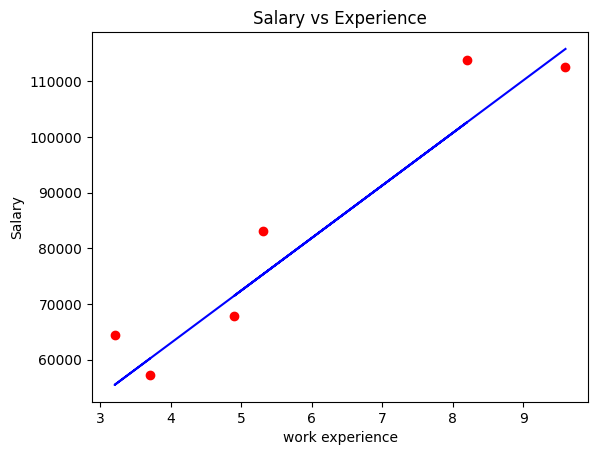

In [23]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('work experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()